<img src="propiedades.png" width="40%" height="40%">
<img src="complex.png" width="40%" height="40%">


# Definicion de un arbol de ejemplo

In [5]:
tree = {  # A toy tree state space
    'label': "a", 'value': 6,
    'children': [
        {
            'label': "b", 'value': 3,
            'children': [
                {'label': "d", 'value': 5, 'children': []},
                {'label': "e", 'value': 4, 'children': []}
            ]
        },
        {
            'label': "c",  'value': 1,
            'children': [
                {'label': "f", 'value': 2, 'children': []},
                {'label': "g", 'value': 0, 'children': []}
            ]
        }
    ]
}


# Definimos la función que devuelve los hijos de un nodo
def get_childs(node):
    return node['children']


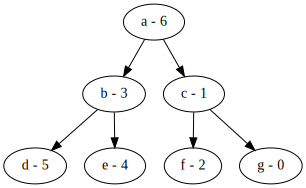

In [6]:
import graphviz as gv

def represent_graph(tree, graph=None, parent=None):
    if graph is None:
        graph = gv.Digraph()
    graph.node(tree['label'], tree['label'] + ' - ' + str(tree['value']))
    if parent:
        graph.edge(parent, tree['label'])
    for child in tree['children']:
        represent_graph(child, graph, tree['label'])
    return graph

represent_graph(tree)

# Objetivo de busqueda

In [7]:
# Definimos la función que comprueba si el nodo es el objetivo
def is_goal(node):

    # Obtenemos el valor de la etiqueta del nodo
    label=node['label']
    print(label,end='')

    # Devolvemos True si la etiqueta es g
    return label=="g"

# Algoritmos de busqueda en Arbol

## Busqueda en profundidad

DFS significa "Búsqueda en profundidad" (Depth-First Search). Es un algoritmo de búsqueda que se utiliza para recorrer un grafo o un árbol. Funciona explorando todos los nodos de un camino desde el nodo raíz hasta el fondo antes de pasar al siguiente camino.

La idea detrás de DFS es simular la forma en que un humano exploraría un espacio desconocido, explorando todas las rutas disponibles en un camino antes de volver atrás y tomar otro camino. DFS se utiliza a menudo en problemas de caminos más cortos, ciclos y componentes conectadas.

<img src="dfs.png" width="40%" height="40%">


In [13]:
def deep_first_search(nodes: list, goalp, getnext):

    # Si no quedan nodos por explorar, devolvemos None
    if nodes==[]:
        return None

    # Obtenemos el primer nodo de la lista
    current=nodes[0]

    # Si el nodo es el objetivo, devolvemos el nodo
    if goalp(current):
        return current

    # Si no es el objetivo, devolvemos la llamada recursiva, 
    # pasando como nodos los hijos del nodo actual + los nodos restantes    
    return deep_first_search( getnext(current)+nodes[1:], goalp, getnext)

In [14]:
deep_first_search([tree], is_goal, get_childs)

abdecfg

{'label': 'g', 'value': 0, 'children': []}

## Busqueda en anchura

Para implementar una búsqueda en anchura, en lugar de utilizar una llamada recursiva, se puede utilizar una cola para almacenar los nodos por explorar. El algoritmo funciona al tomar el primer nodo en la cola, verificar si es el objetivo, y agregar sus hijos al final de la cola. El siguiente nodo en la cola se convierte en el nodo actual y se repite el proceso hasta que se encuentra el objetivo o se agotan los nodos por explorar.

En este ejemplo, se utiliza una cola para almacenar los nodos por explorar en lugar de una lista recursiva. Se toma el primer nodo de la cola y se verifica si es el objetivo (if goalp(current)). Si no es el objetivo, se agrega los hijos del nodo actual a la cola (queue += getnext(current)) y se repite el proceso hasta que se encuentra el objetivo o se agotan los nodos por explorar.

<img src="bfs.png" width="40%" height="40%">


In [10]:
def breadth_first_search(nodes: list, goalp, getnext):
    # Creamos una cola para almacenar los nodos por explorar
    queue = nodes.copy()
    # Mientras queden nodos en la cola
    while queue:
        # Obtenemos el primer nodo de la cola
        current = queue.pop(0)
        # Si el nodo es el objetivo, devolvemos el nodo
        if goalp(current):
            return current
        # Agregamos los hijos del nodo actual a la cola
        queue += getnext(current)
    # Si no quedan nodos por explorar, devolvemos None
    return None


In [11]:
breadth_first_search([tree], is_goal, get_childs)

abcdefg

{'label': 'g', 'value': 0, 'children': []}

## Busqueda en profundidad limitada

DLS significa "Búsqueda en profundidad limitada" (Depth-Limited Search). Es una variante de la búsqueda en profundidad (DFS) en la que se establece un límite máximo para la profundidad de búsqueda. DLS detiene la búsqueda en cualquier punto si se alcanza el límite de profundidad establecido.

La idea detrás de DLS es evitar que la búsqueda se convierta en un bucle infinito en caso de que exista un ciclo en el grafo o árbol. También se utiliza para evitar que la búsqueda consuma una cantidad excesiva de tiempo o memoria en caso de que el grafo o el árbol sean muy grandes.

Es importante tener en cuenta que DLS no garantiza encontrar la solución óptima en un problema de búsqueda, ya que la solución podría estar más allá del límite de profundidad establecido. Sin embargo, puede ser útil en algunos casos para encontrar una solución aceptable en un tiempo razonable.

In [21]:
def deep_limited_search(node, goalp, getnext, depth):
    # Si el nodo actual es el objetivo, se devuelve
    if goalp(node):
        return node
    # Si aún se puede seguir explorando a una mayor profundidad
    if depth > 0:
        # Itera a través de los hijos del nodo actual
        for child in getnext(node):
            # Llamada recursiva a la función con el hijo actual y una profundidad menor
            found = deep_limited_search(child, goalp, getnext, depth-1)
            # Si se ha encontrado un nodo objetivo, se devuelve
            if not found is None:
                return found
                
    # Si no se ha encontrado un nodo objetivo o se ha alcanzado el límite de profundidad, se devuelve None
    return None


In [23]:
deep_limited_search(tree, is_goal, get_childs, 2)

abdecfg

{'label': 'g', 'value': 0, 'children': []}

## Busqueda en profundidad iterativa

La búsqueda en profundidad iterativa (IDDFS) es una técnica de búsqueda que combina la búsqueda en profundidad (DFS) con una límite de profundidad. En lugar de expandir todos los hijos de un nodo hasta llegar a una profundidad específica, IDDFS expande los hijos de un nodo hasta alcanzar un límite de profundidad y luego retrocede y aumenta el límite de profundidad antes de continuar expandiendo los hijos del siguiente nodo.

En el código que me has proporcionado, se itera sobre las profundidades (depth = 0) y se llama a la función deep_limited_search con la profundidad actual (deep_limited_search(node, goalp, getnext, depth)). Si se ha encontrado un nodo objetivo, se devuelve (if result is not None: return result) y si no se ha encontrado un nodo objetivo, se incrementa la profundidad (depth += 1) y se vuelve a realizar la búsqueda en profundidad con una profundidad más grande.

La IDDFS es una técnica completa y óptima, ya que garantiza encontrar la solución con menor costo si existe y al mismo tiempo no tiene problemas de espacio ya que solo guarda los nodos que estan en la frontera, el espacio es O(b^d), donde d es la profundidad máxima y b es el número máximo de nodos hijos de un nodo. Sin embargo, tiene un tiempo de complejidad O(b^d), lo cual puede ser muy alto para problemas con profundidades muy grandes.

In [22]:
def iterative_deepening_deep_first(node, goalp, getnext):

    # Se itera sobre las profundidades
    depth = 0

    # Mientras no se encuentre un nodo objetivo
    while True:
        # Se llama a la función deep_limited_search con la profundidad actual
        result = deep_limited_search(node, goalp, getnext, depth)

        # Si se ha encontrado un nodo objetivo, se devuelve
        if result is not None:
            return result

        # Si no se ha encontrado un nodo objetivo, se incrementa la profundidad    
        depth += 1


In [21]:

iterative_deepening_deep_first(tree, is_goal, get_childs)

aabcabdecfg

{'label': 'g', 'value': 0, 'children': []}

## Busqueda de coste uniforme

La búsqueda con coste uniforme (UCS) es un algoritmo de búsqueda en grafos que se asemeja a la búsqueda en anchura, pero en lugar de expandir los nodos en orden de profundidad, los expande en orden de costo.

UCS utiliza una cola de prioridad en lugar de una cola simple para almacenar los nodos por expandir. En cada iteración, el nodo con el costo más bajo se saca de la cola de prioridad y se expande. Si el nodo actual es el objetivo, se devuelve. Si no es el objetivo, se itera a través de los hijos del nodo actual y se calcula el costo total para cada uno (suma del costo del arco y el costo acumulado del nodo actual). Si el hijo no ha sido visitado o si su costo total es menor que el costo previamente registrado, se agrega el hijo a la cola de prioridad con su costo total y se registra su costo total en un diccionario de nodos visitados.

La complejidad temporal de la búsqueda con coste uniforme es O(bC*/ε) (exponencial en la profundidad efectiva), donde b es el número máximo de nodos hijos de un nodo, C* es el costo de la solución óptima, y ε es el costo mínimo de los arcos. Sin embargo, debido a que la búsqueda con coste uniforme siempre selecciona el nodo con el costo más bajo, es completa y óptima. El espacio que utiliza es el del último nivel, es decir O(bC*/ε) ya que guarda los nodos de la frontera de exploración.

<img src="ucs.png" width="40%" height="40%">
<img src="ucs_ex.png" width="40%" height="40%">


In [37]:
# Se ha tenido que implementar una clase auxiliar, ya que el nodo en formato
# dict no se puede hashear, y es necesario para poder usarlo en la cola de prioridad

class Node_AUX:

    def __init__(self, dict):
        self.lbl = dict['label']
        # EL costo de la ruta padre-self
        self.v = dict['value']
        self.children = dict['children']

    def __hash__(self) -> int:
        return hash(self.lbl)

    def get_childs(self):
        return self.children

    def __lt__(self, other):
        return self.v < other.v

# Definimos la función que comprueba si el nodo es el objetivo
# En este caso, se ha modificado para adaptarse a la estructura de objeto
def goal_Node_AUX(node):
    print(node.lbl, end='')
    return node.lbl == "g"


# La funcion get_childs se encuentra implementada en Node_AUX
def get_childs_Node_AUX(node):
    return node.get_childs()


In [39]:
import heapq

def uniform_cost_search(start, goalp, get_next):

    # Creamos un objeto Node_AUX para poder usarlo en la cola de prioridad
    start = Node_AUX(start)

    # Creamos una cola de prioridad para almacenar los nodos por explorar
    queue = []
    heapq.heappush(queue, (0, start))
    # Creamos un diccionario para almacenar los costos de los nodos ya visitados
    visited = {}
    visited[start] = 0
    
    # Mientras queden nodos en la cola de prioridad
    while queue:
        # Obtenemos el nodo con el costo más bajo
        current = heapq.heappop(queue)[1]
        # Si el nodo es el objetivo, devolvemos el nodo
        if goalp(current):
            return current
        # Iteramos a través de los hijos del nodo actual
        for child in get_next(current):

            # Creamos un objeto Node_AUX para poder usarlo en la cola de prioridad
            child = Node_AUX(child)

            # Calculamos el costo total para el hijo
            cost =  child.v + visited[current]
            # Si el hijo no ha sido visitado o si su costo total es menor que el costo previamente registrado
            if child not in visited or cost < visited[child]:
                # Agregamos el hijo a la cola de prioridad con su costo total
                heapq.heappush(queue, (cost, child))
                # Registramos su costo total en el diccionario de nodos visitados
                visited[child] = cost
                
    # Si no quedan nodos por explorar, devolvemos None
    return None


In [42]:
n = uniform_cost_search(tree, goal_Node_AUX, get_childs_Node_AUX)
print("\nSe ha encontrado el nodo objetivo: ", n.lbl)


acg
Se ha encontrado el nodo objetivo:  g
